<a href="https://colab.research.google.com/github/limeng1011/DataProjectsfrom100DayswithPython/blob/main/PlayStoreAppAnalytics033122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [ ]:
import pandas as pd

# Notebook Presentation

In [ ]:
# Show numeric output in decimal format e.g., 2.15
# pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [ ]:
df_apps = pd.read_csv('apps.csv')

In [ ]:
df_apps.info()
df_apps.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size_MBs        10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Android_Ver     10839 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1016.5+ KB


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social,"July 28, 2017",4.1 and up
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education,"April 15, 2016",3.0 and up
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",4.2 and up
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business,"August 6, 2018",4.1 and up


In [ ]:
df_apps[df_apps['App']=='CX Network']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business,"August 6, 2018",4.1 and up


# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [ ]:
df_apps.shape

(10841, 12)

In [ ]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')

In [ ]:
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
5821,Dairy Queen,FOOD_AND_DRINK,3.60,742,43.00,"100,000",Free,0,Everyone,Food & Drink,"July 25, 2018",4.1 and up
837,DG Xplained,HEALTH_AND_FITNESS,NaN,1,12.00,100,Free,0,Everyone,Health & Fitness,"May 2, 2018",4.1 and up
3094,CT POSITIONING,MEDICAL,4.50,18,9.30,"5,000",Free,0,Everyone,Medical,"March 10, 2018",4.0.3 and up
1471,Pint - FN Theme,PERSONALIZATION,2.50,6,0.23,100,Free,0,Everyone,Personalization,"August 10, 2013",2.2 and up
1557,Wipe out,EVENTS,4.70,30,6.30,500,Free,0,Teen,Events,"May 23, 2018",Varies with device


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [ ]:
df_apps = df_apps.drop(columns=['Last_Updated', 'Android_Ver'])
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business


### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [ ]:
df_apps.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size_MBs             0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
dtype: int64

In [ ]:
nan_rows = df_apps[df_apps.isna().any(axis=1)]
nan_rows.shape

(1474, 10)

In [ ]:
nan_rows[nan_rows['Type'].isna()]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy


In [ ]:
df_apps.Rating.isna().values.sum()

1474

In [ ]:
df_apps.isna().values.sum()

1475

In [ ]:
nan_rows2 = df_apps[df_apps.Rating.isna()]

In [ ]:
nan_rows2.shape

(1474, 10)

In [ ]:
df_apps_clean = df_apps.dropna()

In [ ]:
df_apps_clean.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical


In [ ]:
df_apps_clean.shape

(9367, 10)

### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [ ]:
duplicated_rows = df_apps_clean[df_apps_clean.duplicated(keep=False)]
duplicated_rows.shape

(879, 10)

In [ ]:
duplicated_rows[duplicated_rows.App == 'MouseMingle']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
1132,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating


In [ ]:
duplicated_rows2 = df_apps_clean[df_apps_clean.duplicated(subset=['App','Type','Price'])]
duplicated_rows2.shape

(1168, 10)

In [ ]:
duplicated_rows2[duplicated_rows2['App'] == 'MouseMingle']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating


In [ ]:
duplicated_rows2

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
946,420 BZ Budeze Delivery,MEDICAL,5.00,2,11.00,100,Free,0,Mature 17+,Medical
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.40,8,6.50,100,Paid,$12.99,Everyone,Medical
1231,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1247,Chat Kids - Chat Room For Kids,DATING,4.70,6,4.90,100,Free,0,Mature 17+,Dating
...,...,...,...,...,...,...,...,...,...,...
10836,Subway Surfers,GAME,4.50,27723193,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10837,Subway Surfers,GAME,4.50,27724094,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10838,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10839,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade


In [ ]:
duplicated_rows = df_apps_clean[df_apps_clean.duplicated()]

In [ ]:
duplicated_rows.shape

(476, 10)

In [ ]:
duplicated_rows.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
946,420 BZ Budeze Delivery,MEDICAL,5.00,2,11.00,100,Free,0,Mature 17+,Medical
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.40,8,6.50,100,Paid,$12.99,Everyone,Medical
1231,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1247,Chat Kids - Chat Room For Kids,DATING,4.70,6,4.90,100,Free,0,Mature 17+,Dating


In [ ]:
df_apps_clean[df_apps_clean.App == 'MouseMingle']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
1132,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating


In [ ]:
df_apps_clean = df_apps_clean.drop_duplicates(subset=['App','Type','Price'])

In [ ]:
df_apps_clean.shape

(8199, 10)

In [ ]:
df_apps_clean[df_apps_clean.App == 'MouseMingle']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
1132,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating


# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [ ]:
df_apps_clean.sort_values('Rating', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.00,2,22.00,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.00,36,2.60,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.00,13,2.60,100,Free,0,Everyone,Photography


# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [ ]:
df_apps_clean.sort_values('Size_MBs', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness


# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [ ]:
df_apps_clean.sort_values('Reviews', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [ ]:
ratings = df_apps_clean['Content_Rating'].value_counts()

In [ ]:
ratings

Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

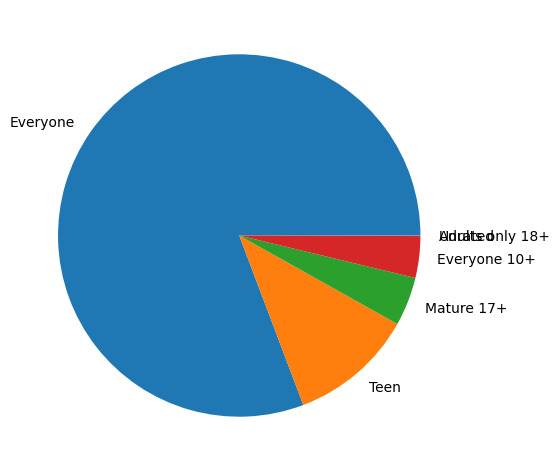

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
plt.pie(ratings.values, labels=ratings.index)
plt.show()

In [ ]:
fig = px.pie(values=ratings.values, 
             names=ratings.index, 
             labels=ratings.index, 
             title='Content Rating', 
             hole=0.5,
             )
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [ ]:
df_apps_clean['Installs'].describe()

count          8199
unique           19
top       1,000,000
freq           1417
Name: Installs, dtype: object

In [ ]:
df_apps_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8199 entries, 21 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8199 non-null   object 
 1   Category        8199 non-null   object 
 2   Rating          8199 non-null   float64
 3   Reviews         8199 non-null   int64  
 4   Size_MBs        8199 non-null   float64
 5   Installs        8199 non-null   object 
 6   Type            8199 non-null   object 
 7   Price           8199 non-null   object 
 8   Content_Rating  8199 non-null   object 
 9   Genres          8199 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 704.6+ KB


In [ ]:
df_apps_clean.groupby('Installs').agg({'App': pd.Series.count})

,App
Installs,
1,3
"1,000",698
"1,000,000",1417
"1,000,000,000",20
10,69
"10,000",988
"10,000,000",933
100,303
"100,000",1096


In [ ]:
df_apps_clean[['App','Installs']].groupby('Installs').count()

,App
Installs,
1,3
"1,000",698
"1,000,000",1417
"1,000,000,000",20
10,69
"10,000",988
"10,000,000",933
100,303
"100,000",1096


In [ ]:
df_apps_clean.Installs = df_apps_clean.Installs.astype(str).str.replace(',','')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_apps_clean.Installs = pd.to_numeric(df_apps_clean.Installs)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_apps_clean[['App','Installs']].groupby('Installs').count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [ ]:
df_apps_clean['Price'].describe()

count     8199
unique      73
top          0
freq      7595
Name: Price, dtype: object

In [ ]:
df_apps_clean['Price'] = df_apps_clean['Price'].astype(str).str.replace('$','')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
df_apps_clean

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
10824,Google Drive,PRODUCTIVITY,4.40,2731171,4.00,"1,000,000,000",Free,0,Everyone,Productivity
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10829,Google Play Movies & TV,VIDEO_PLAYERS,3.70,906384,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10831,Google News,NEWS_AND_MAGAZINES,3.90,877635,13.00,"1,000,000,000",Free,0,Teen,News & Magazines


In [ ]:
df_apps_clean['Price'] = df_apps_clean['Price'].astype('str').str.replace('$','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
df_apps_clean['Price'] = pd.to_numeric(df_apps_clean['Price'])

### The most expensive apps sub $250

In [ ]:
df_apps_clean.sort_values('Price', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,"10,000",Paid,400.00,Everyone,Lifestyle
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,"1,000",Paid,399.99,Everyone,Finance
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,"50,000",Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.50,472,0.94,"5,000",Paid,399.99,Everyone,Finance
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,"10,000",Paid,399.99,Everyone,Lifestyle


In [ ]:
df_apps_clean = df_apps_clean[df_apps_clean['Price']<250]

In [ ]:
df_apps_clean.sort_values('Price', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.00,1000,Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.00,6,1.30,100,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.20,134,1.80,1000,Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.50,214,68.00,1000,Paid,33.99,Everyone,Medical
2463,PTA Content Master,MEDICAL,4.20,64,41.00,1000,Paid,29.99,Everyone,Medical


### Highest Grossing Paid Apps (ballpark estimate)

In [ ]:
df_apps_clean['Revenue Estimate 1'] = df_apps_clean['Price']*df_apps_clean['Installs']
df_apps_clean['Revenue Estimate 2'] = df_apps_clean['Price'].mul(df_apps_clean['Installs'])

In [ ]:
df_apps_clean[['Revenue Estimate 1', 'Revenue Estimate 2']]
df_apps_clean.drop(columns=['Revenue Estimate 1', 'Revenue Estimate 2'], axis=1)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0.00,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0.00,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0.00,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
10824,Google Drive,PRODUCTIVITY,4.40,2731171,4.00,1000000000,Free,0.00,Everyone,Productivity
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,1000000000,Free,0.00,Teen,Video Players & Editors
10829,Google Play Movies & TV,VIDEO_PLAYERS,3.70,906384,4.65,1000000000,Free,0.00,Teen,Video Players & Editors
10831,Google News,NEWS_AND_MAGAZINES,3.90,877635,13.00,1000000000,Free,0.00,Teen,News & Magazines


In [ ]:
df_apps_clean['Revenue Estimate'] = df_apps_clean['Price'].mul(df_apps_clean['Installs'])

In [ ]:
df_apps_clean.sort_values('Revenue Estimate', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue Estimate 1,Revenue Estimate 2,Revenue Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00","69,900,000.00","69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00","9,900,000.00","9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00","6,990,000.00","6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00","5,990,000.00","5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00","5,990,000.00","5,990,000.00"


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [ ]:
df_apps_clean['Category'].value_counts()

FAMILY                 1606
GAME                    910
TOOLS                   719
PRODUCTIVITY            301
PERSONALIZATION         298
LIFESTYLE               297
FINANCE                 296
MEDICAL                 292
PHOTOGRAPHY             263
BUSINESS                262
SPORTS                  260
COMMUNICATION           257
HEALTH_AND_FITNESS      243
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
EDUCATION               118
MAPS_AND_NAVIGATION     118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       64
HOUSE_AND_HOME           62
ART_AND_DESIGN           61
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [ ]:
df_apps_clean.groupby('Category').count()['App']

Category
ART_AND_DESIGN           61
AUTO_AND_VEHICLES        73
BEAUTY                   42
BOOKS_AND_REFERENCE     169
BUSINESS                262
COMICS                   54
COMMUNICATION           257
DATING                  134
EDUCATION               118
ENTERTAINMENT           102
EVENTS                   45
FAMILY                 1606
FINANCE                 296
FOOD_AND_DRINK           94
GAME                    910
HEALTH_AND_FITNESS      243
HOUSE_AND_HOME           62
LIBRARIES_AND_DEMO       64
LIFESTYLE               297
MAPS_AND_NAVIGATION     118
MEDICAL                 292
NEWS_AND_MAGAZINES      204
PARENTING                50
PERSONALIZATION         298
PHOTOGRAPHY             263
PRODUCTIVITY            301
SHOPPING                180
SOCIAL                  203
SPORTS                  260
TOOLS                   719
TRAVEL_AND_LOCAL        187
VIDEO_PLAYERS           148
WEATHER                  72
Name: App, dtype: int64

In [ ]:
df_apps_clean['Category'].nunique()

33

In [ ]:
top_10_category = df_apps_clean['Category'].value_counts()[0:10]

In [ ]:
bar = px.bar(x=top_10_category.index, 
             y=top_10_category.values,
             color=top_10_category.values)
bar.update_layout(xaxis_title='Category',
                  yaxis_title='Number of Apps')
bar.show()

### Vertical Bar Chart - Highest Competition (Number of Apps)

In [ ]:
df_apps_clean.groupby('Category').agg({'Installs': pd.Series.sum})

,Installs
Category,
ART_AND_DESIGN,114233100
AUTO_AND_VEHICLES,53129800
BEAUTY,26916200
BOOKS_AND_REFERENCE,1665791655
BUSINESS,692018120
COMICS,44931100
COMMUNICATION,11039241530
DATING,140912410
EDUCATION,352852000


### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [ ]:
category_installs = df_apps_clean.groupby('Category').agg({'Installs':pd.Series.sum})
category_installs.shape

(33, 1)

In [ ]:
type(df_apps_clean['Category'].value_counts())

pandas.core.series.Series

In [ ]:
category_installs.sort_values('Installs', inplace=True)

In [ ]:
category_installs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, GAME to EVENTS
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Installs  33 non-null     int64
dtypes: int64(1)
memory usage: 528.0+ bytes


In [ ]:
h_bar = px.bar(x=category_installs.Installs, y=category_installs.index, orientation='h')
h_bar.update_layout(xaxis_title='Number of Installs', yaxis_title='Category')
h_bar.show()

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

In [ ]:
cat_app_installs = df_apps_clean.groupby('Category').agg({'App': pd.Series.count, 'Installs': pd.Series.sum})

In [ ]:
cat_app_installs.shape

(33, 2)

In [ ]:
cat_number = df_apps_clean.groupby('Category').agg({'App': pd.Series.count})

In [ ]:
cat_number

,App
Category,
ART_AND_DESIGN,61
AUTO_AND_VEHICLES,73
BEAUTY,42
BOOKS_AND_REFERENCE,169
BUSINESS,262
COMICS,54
COMMUNICATION,257
DATING,134
EDUCATION,118


In [ ]:
merged_df = pd.merge(cat_number, category_installs, on='Category', how='inner')

In [ ]:
merged_df.head()

,App,Installs
Category,,
ART_AND_DESIGN,61,114233100
AUTO_AND_VEHICLES,73,53129800
BEAUTY,42,26916200
BOOKS_AND_REFERENCE,169,1665791655
BUSINESS,262,692018120


In [ ]:
scatter = px.scatter(merged_df,
                     x='App',
                     y='Installs',
                     title="Category Concentration",
                     size='App',
                     hover_name=merged_df.index,
                     color='Installs')
scatter.update_layout(xaxis_title = 'Number of Apps',
                      yaxis_title = 'Number of Installs',
                      yaxis=dict(type='log'))
scatter.show()

In [ ]:
scatter2 = px.scatter(x = cat_app_installs['App'],
                      y = cat_app_installs['Installs'],
                      size = cat_app_installs['App'],
                      color = cat_app_installs['Installs'],
                      color_continuous_scale = px.colors.sequential.Agsunset,
                      hover_name = cat_app_installs.index,
                      title = 'Category Concentration')
scatter2.update_layout(xaxis_title = 'Number of Apps',
                       yaxis_title = 'Number of Installs',
                       yaxis = {'type': 'log'})
scatter2.show()

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


In [ ]:
df_apps_clean['Genres'].nunique()

114

In [ ]:
len(df_apps_clean['Genres'].unique())

114

In [ ]:
df_apps_clean['Genres'].str.split(';', expand=True).stack().value_counts()

Tools                      719
Education                  587
Entertainment              498
Action                     304
Productivity               301
Personalization            298
Lifestyle                  298
Finance                    296
Medical                    292
Sports                     270
Photography                263
Business                   262
Communication              258
Health & Fitness           245
Casual                     216
News & Magazines           204
Social                     203
Simulation                 200
Travel & Local             187
Arcade                     185
Shopping                   180
Books & Reference          171
Video Players & Editors    150
Dating                     134
Puzzle                     124
Maps & Navigation          118
Role Playing               111
Racing                     103
Action & Adventure          96
Strategy                    95
Food & Drink                94
Educational                 93
Adventur

In [ ]:
stack = df_apps_clean['Genres'].str.split(';', expand=True).stack()

In [ ]:
num_genres = stack.value_counts()
len(num_genres)

53

# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

In [ ]:
bar2 = px.bar(data_frame = num_genres,
              x=num_genres.index[:15],
              y=num_genres.values[:15],
              title="Top Genres",
              hover_name=num_genres.index[:15],
              color=num_genres.values[:15],
              color_continuous_scale='Agsunset'
              )
bar2.update_layout(xaxis_title="Genre",
                   yaxis_title='Number of Apps',
                   coloraxis_showscale=False)
bar2.show()

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [ ]:
app_free_paid = df_apps_clean.groupby(['Category','Type'], as_index=False).agg({'App': pd.Series.count})

In [ ]:
bar2 = px.bar(x = app_free_paid['Category'],
              y = app_free_paid['App'],
              color = app_free_paid['Type'],
              barmode = 'group',
              title = ' Paid vs Free App in each Category')
bar2.update_layout(xaxis_title = 'Category',
                   yaxis_title = 'Number of Apps',
                   yaxis = {'type':'log'},
                   xaxis = {'categoryorder':'total descending'})
bar2.show()

In [ ]:
df_apps_clean['Type'].value_counts()

Free    7595
Paid     589
Name: Type, dtype: int64

**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

In [ ]:
df_free_paid = df_apps_clean.groupby(['Category','Type'], as_index=False).agg({'App':pd.Series.count})

In [ ]:
df_free_paid

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42
...,...,...,...
56,TRAVEL_AND_LOCAL,Paid,8
57,VIDEO_PLAYERS,Free,144
58,VIDEO_PLAYERS,Paid,4
59,WEATHER,Free,65


In [ ]:
bar3 = px.bar(data_frame = df_free_paid,
              x = df_free_paid.Category,
              y = df_free_paid.App,
              color = df_free_paid.Type,
              barmode = 'group',
              title = 'Free vs Paid')
bar3.update_layout(xaxis_title = 'Category',
                   yaxis_title = 'Number of Apps',
                   xaxis = {'categoryorder':'total descending'},
                   yaxis = {'type':'log'})
bar3.show()

In [ ]:
bar4 = px.bar(data_frame = df_free_paid,
              x = df_free_paid.Category,
              y = df_free_paid.App,
              color = df_free_paid.Type,
              barmode = 'group',
              title = 'Free vs Paid',
              log_y = True)
bar3.update_layout(xaxis_title = 'Category',
                   yaxis_title = 'Number of Apps',
                   xaxis = {'categoryorder':'total descending'},
                   )
bar3.show()

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


In [ ]:
box = px.box(data_frame = df_apps_clean,
             x = df_apps_clean['Type'],
             y = df_apps_clean['Installs'],
             color = df_apps_clean['Type'],
             log_y = True,
             notched = True,
             points = 'all')

box.show()

In [ ]:
box2 = px.box(x = df_apps_clean['Category'],
              y = df_apps_clean['Revenue Estimate'],
              log_y = True,
              points = 'all',
              notched = True)
box2.show()

# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

In [ ]:
df_paid_apps = df_apps_clean[df_apps_clean['Type'] == 'Paid']

In [ ]:
box2 = px.box(data_frame = df_paid_apps,
              x = df_paid_apps['Category'],
              y = df_paid_apps['Revenue Estimate'],
              title = 'How much can paid apps earn?', 
              log_y = True,
              points = 'all')
box2.update_layout(xaxis = {'categoryorder':'min ascending'})
box2.show()

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.

In [ ]:
df_paid_apps['Price'].describe()

count   589.00
mean      4.48
std       5.77
min       0.99
25%       1.99
50%       2.99
75%       4.99
max      79.99
Name: Price, dtype: float64

In [ ]:
box3 = px.box(data_frame = df_paid_apps,
              x = df_paid_apps['Category'],
              y = df_paid_apps['Price'],
              log_y = True,
              title = 'How much to charge?')
box3.update_layout(xaxis = {'categoryorder': 'max descending'},
                   yaxis_title = 'Paid App Price')
box3.show()